In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../data/titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Process the data
char_cabin = data['Cabin'].astype(str) # convert cabin to str
new_cabin = np.array([cabin[0] for cabin in char_cabin])
data['cabin'] = pd.Categorical(new_cabin)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [15]:
# Process for the Age
mean_age = data['Age'].mean()

In [16]:
mean_age

29.69911764705882

In [17]:
new_age_var = np.where(data['Age'].isnull(), mean_age, data['Age'])
data['Age'] = new_age_var

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# next: build up Logistic Regression model
from sklearn import linear_model
from sklearn import preprocessing

# 1. {Gender} -> Survived probability

In [24]:
# Convert Sex variable to numeric
label_encoder = preprocessing.LabelEncoder()
encoded_sex = label_encoder.fit_transform(data.Sex)

In [25]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

In [27]:
# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), y= data.Survived)

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
len(encoded_sex)

891

In [39]:
# check intercept and coefficients
print(log_model.intercept_)

[1.00027876]


In [40]:
print(log_model.coef_)

[[-2.43010712]]


In [41]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))

In [43]:
preds = pd.DataFrame(preds)
preds.columns = ['Death_prob', 'Survival_prob']
print(preds)

     Death_prob  Survival_prob
0      0.806875       0.193125
1      0.268887       0.731113
2      0.268887       0.731113
3      0.268887       0.731113
4      0.806875       0.193125
..          ...            ...
886    0.806875       0.193125
887    0.268887       0.731113
888    0.268887       0.731113
889    0.806875       0.193125
890    0.806875       0.193125

[891 rows x 2 columns]


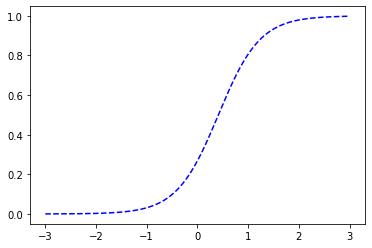

In [35]:
# Visualize the model
X_new = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_proba = log_model.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 0], "b--", label='Survival')
plt.show()

# 2. Predict [Pclass, Cabin, Sex, Age] -> Survived probability

In [47]:
encoded_class = label_encoder.fit_transform(data.Pclass)
encoded_cabin = label_encoder.fit_transform(data.cabin)

In [48]:
train_features = pd.DataFrame([encoded_class, encoded_cabin, encodec_sex, data.Age]).T

In [49]:
train_features.head()

,0,1,2,3
0,2.0,8.0,1.0,22.0
1,0.0,2.0,0.0,38.0
2,2.0,8.0,0.0,26.0
3,0.0,2.0,0.0,35.0
4,2.0,8.0,1.0,35.0


In [50]:
log_model2 = linear_model.LogisticRegression()

In [51]:
# train the model
log_model2.fit(X=train_features, y=data.Survived)

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
preds = log_model2.predict(X=train_features)

In [53]:
# Evaluation
# 1. Prediction accuracy
log_model2.score(X=train_features, y=data.Survived)

0.792368125701459

In [54]:
# 2. Confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_true=data.Survived, y_pred=preds)

array([[465,  84],
       [101, 241]])

In [55]:
# 3. Classification report
print(metrics.classification_report(y_true= data.Survived, y_pred=preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



# Well Done!